# Loans Data Exploration

## Preliminary Wrangling

This document explores a dataset containing loans, their status and the customers that are processing the loan.

In [153]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [154]:
#Load the dataset
loans = pd.read_csv('prosperLoanData.csv')

In [155]:
# high-level overview of data shape and composition
print(loans.shape)
print(loans.dtypes)
print(loans.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [156]:
#Check the status of values in the dataset if they are null
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [157]:
numeric_vars = ['BorrowerAPR','BorrowerRate','LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'MonthlyLoanPayment', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']
categoric_vars = ['BorrowerState', 'LoanStatus', 'Occupation', 'EmploymentStatus', 'IncomeRange']

In [158]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [159]:
#Check the size of the dataset
loans.shape[0]

113937

In [160]:
loans.BorrowerState.unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', nan, 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

In [161]:
ordinal_var_dict = {'LoanStatus': ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', ''],
                    'Occupation': ['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', 'nan', 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',
       'Student - College Senior', 'Principal', "Teacher's Aide",
       'Pilot - Private/Commercial', 'Religious', 'Homemaker',
       'Student - College Graduate Student', 'Student - Technical School',
       'Psychologist', 'Biologist', 'Student - College Sophomore',
       'Judge', 'Student - College Junior', 'Car Dealer',
       'Student - Community College', 'Student - College Freshman', ''],
                   'EmploymentStatus': ['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'nan', 'Not employed', 'Part-time', 'Retired', ''],
                   'IncomeRange': ['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0', ''],
                   'BorrowerState': ['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', '', 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND']}

In [162]:
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [163]:
#looks like the dataset has a lot of empty values. Using fillna to fill them with blanks for now.
#Later on, will fill it numerric values as needed.

[loans[col].fillna(0, inplace=True) for col in numeric_vars]
[loans[col].fillna('', inplace=True) for col in categoric_vars]

[None, None, None, None, None]

In [164]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218780,0.192764,0.182701,0.125608,0.059807,0.071546,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080421,0.074818,0.074516,0.094335,0.053428,0.049426,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.000000,0.000000,-0.010000,-0.182700,0.000000,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.000000,0.000000,0.000000,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209710,0.184000,0.173000,0.131440,0.052400,0.079900,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283700,0.250000,0.240000,0.195200,0.097500,0.108700,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [165]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [166]:
print(loans[loans['LoanStatus'] == 'Past Due (>120 days)'].shape[0])
print(loans[loans['LoanStatus'] == 'Past Due (91-120 days)'].shape[0])
print(loans[loans['LoanStatus'] == 'Past Due (31-60 days)'].shape[0])
print(loans[loans['LoanStatus'] == 'Past Due (61-90 days)'].shape[0])
print(loans[loans['LoanStatus'] == 'Past Due (1-15 days)'].shape[0])

16
304
363
313
806


### What is the structure of your dataset?

There are overall 113937 loan records in the dataset. It elaborately describes with many fields on the loan status and customer details. There are a lot of empty values however. Most of these fields are numeric except the below:

LoanStatus, Occupation, EmploymentStatus and IncomeRange. They are Categorical or Ordinal in nature.

Among all the fields, we will focus on: 'BorrowerAPR','BorrowerRate','LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'MonthlyLoanPayment', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'BorrowerState', 'LoanStatus', 'Occupation', 'EmploymentStatus', 'IncomeRange'

### What is/are the main feature(s) of interest in your dataset?

I am interested in the details of loans that have been past due, defaulted loans. And their relationship with the other parameters in the dataset. I am also intererested in the loans that are in the above statuses but having high EstimatedReturn.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Term, EmploymentStatus, Credit Information, LenderYield, Interest Rate and Montly Payments, Income, State will have impact on the Loan Status.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: EmploymentStatus.

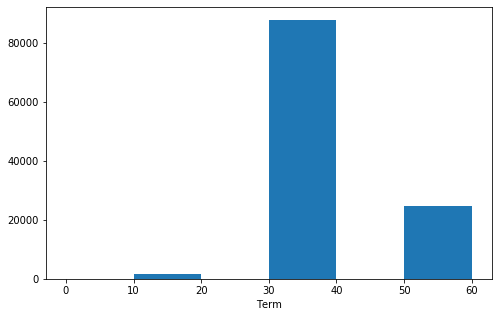

In [167]:
# start with a standard-scaled plot
binsize = 10
bins = np.arange(0, loans['Term'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'Term', bins = bins)
plt.xlabel('Term')
plt.show()

Majority of the loans are in the 30-40 years followed bby 50-60l Short term loans are less is number.

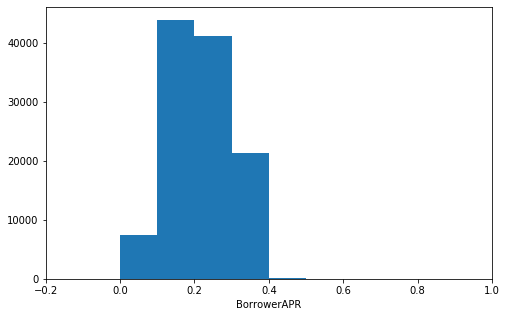

In [168]:
# plotting  on a standard scale

loans['BorrowerAPR'] = np.where(loans['BorrowerAPR'] == '', 0, loans['BorrowerAPR'])
binsize = 0.1
bins = np.arange(0, loans['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins)
plt.xlim([-0.2,1])
plt.xlabel('BorrowerAPR')
plt.show()

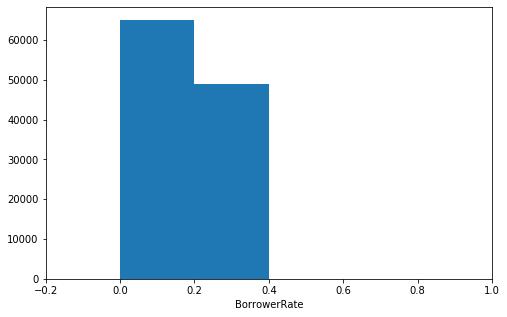

In [169]:
# investigating further on an even smaller bin size
binsize = 0.2
bins = np.arange(0, loans['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerRate', bins = bins)
plt.xlim([-0.2,1])
plt.xlabel('BorrowerRate')
plt.show()

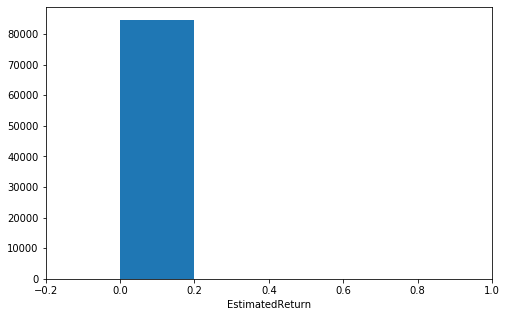

In [170]:
plotdata = loans[loans['EstimatedReturn'] != 0]
plotdata.shape[0]

# investigating further on an even smaller bin size
binsize = 0.2
bins = np.arange(0, plotdata['EstimatedReturn'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = plotdata, x = 'EstimatedReturn', bins = bins)
plt.xlim([-0.2,1])
plt.xlabel('EstimatedReturn')
plt.show()

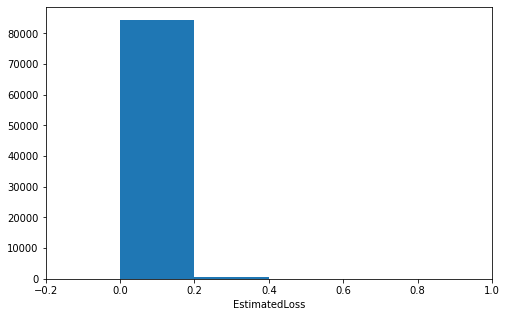

In [171]:
plotdata = loans[loans['EstimatedLoss'] != 0]
plotdata.shape[0]

# investigating further on an even smaller bin size
binsize = 0.2
bins = np.arange(0, plotdata['EstimatedLoss'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = plotdata, x = 'EstimatedLoss', bins = bins)
plt.xlim([-0.2,1])
plt.xlabel('EstimatedLoss')
plt.show()

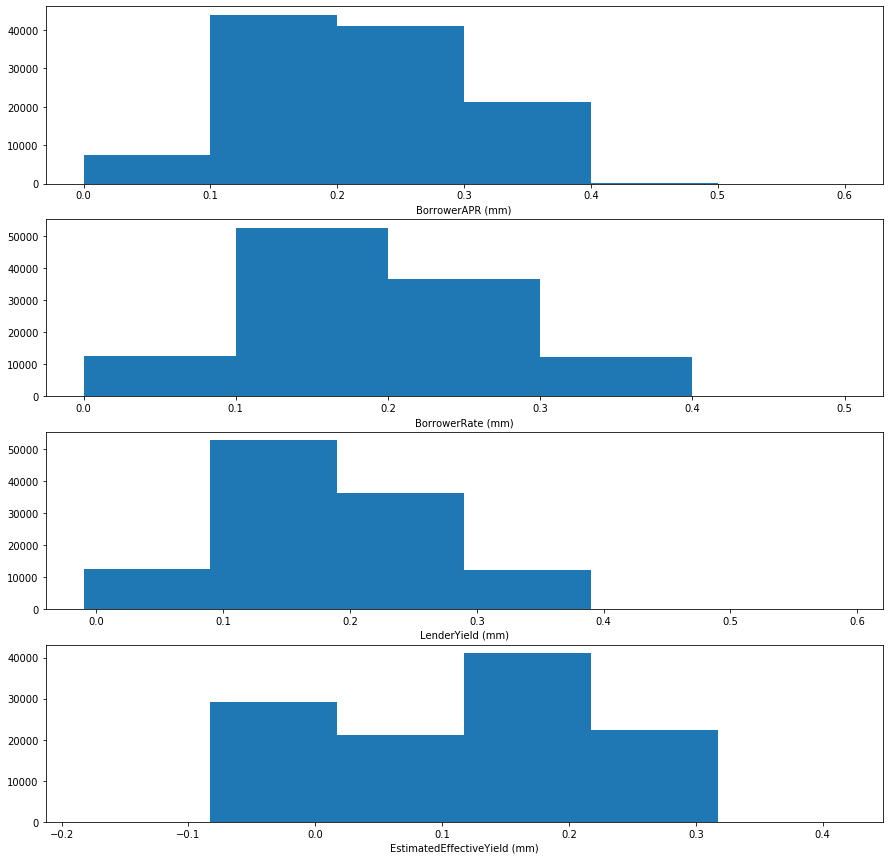

In [172]:
# let's plot together BorrowerAPR, BorrowerRate, LenderYield to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=4, figsize = [15,15])

variables = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loans[var]), max(loans[var])+0.1, 0.1)
    ax[i].hist(data = loans, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

Interest Rate and APR look good in the above plots with all of them peaking at 0.1 to 0.2. There are some loans with negative yield.

I'll now look at the other features in the data to see if any of them hold interesting properties.

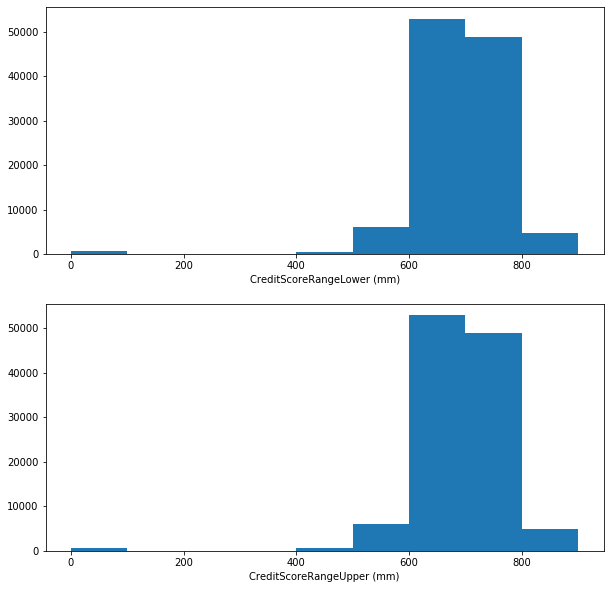

In [173]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])

loans['CreditScoreRangeLower'] = np.where(loans['CreditScoreRangeLower'] == '', 0, loans['CreditScoreRangeLower'])
loans['CreditScoreRangeUpper'] = np.where(loans['CreditScoreRangeUpper'] == '', 0, loans['CreditScoreRangeUpper'])

variables = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loans[var]), max(loans[var])+100, 100)
    ax[i].hist(data = loans, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

No handles with labels found to put in legend.


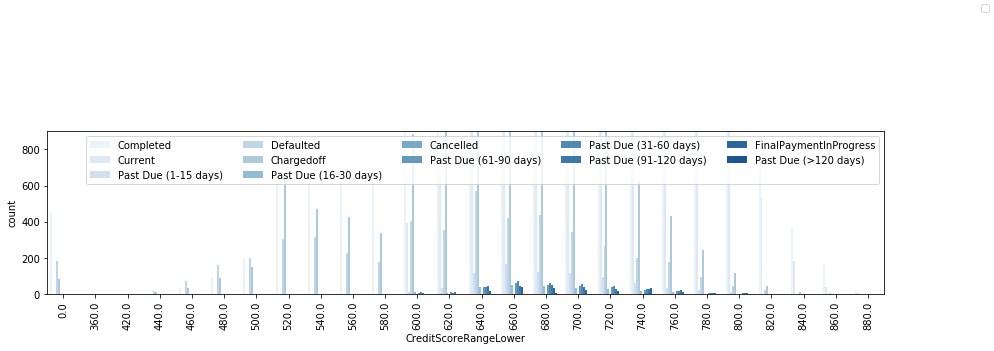

In [174]:
fig, ax = plt.subplots(nrows=1, figsize = [15,15])
plt.subplots_adjust(hspace=1)
fig.legend(loc="upper right")

# subplot 1: BorrowerState vs LoanStatus
ax = plt.subplot(3, 1, 1)
ax.set_ylim(0,900)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
sb.countplot(data = loans, x = 'CreditScoreRangeLower', hue = 'LoanStatus', palette = 'Blues')
ax.legend(loc = 1, ncol = 5)
plt.show()

Looks like there are some loans with low credit scores. Would be iterested in finding out how many of these are in pending. Let us take a look at these low credit score loans features.

In [175]:
temp_low_scores = loans[(loans['CreditScoreRangeLower'] <=500) & (loans['CreditScoreRangeUpper'] <= 500)]

In [176]:
temp_low_scores.shape[0]

1253

In [177]:
print(temp_low_scores.LoanStatus.unique())

['Completed', 'Defaulted', 'Chargedoff', 'Cancelled']
Categories (4, object): ['Completed' < 'Defaulted' < 'Chargedoff' < 'Cancelled']


In [178]:
temp_low_scores[temp_low_scores['LoanStatus'].isin(['Defaulted', 'Chargedoff'])].shape[0]

666

A good 492 out 662 loans are Defaulted or Chargedoff in the low scores dataset. That does indicate that LoanStatus is dependent on the credit scores of the customers that requeste the loan.

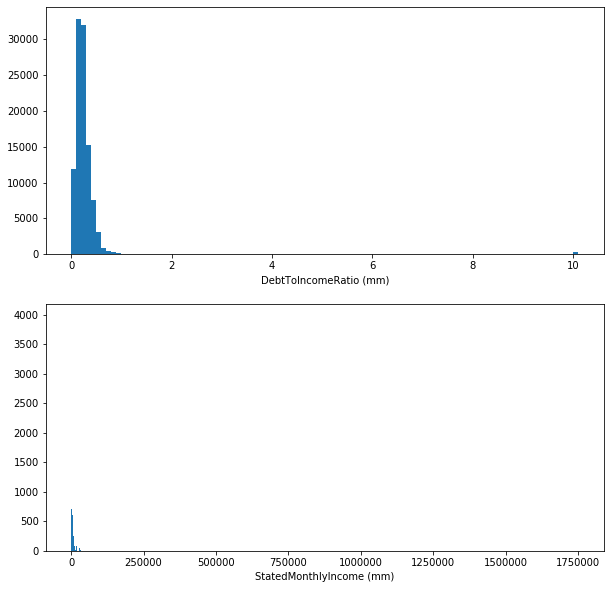

In [179]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])

loans['DebtToIncomeRatio'] = np.where(loans['DebtToIncomeRatio'] == '', 0, loans['DebtToIncomeRatio'])
loans['StatedMonthlyIncome'] = np.where(loans['StatedMonthlyIncome'] == '', 0, loans['StatedMonthlyIncome'])

variables = ['DebtToIncomeRatio', 'StatedMonthlyIncome']
for i in range(len(variables)):
    var = variables[i]
    if var == 'DebtToIncomeRatio':
        bins = np.arange(min(loans[var]), max(loans[var])+0.1, 0.1)
    else:
        bins = np.arange(min(loans[var]), max(loans[var])+100, 100)
    ax[i].hist(data = loans, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

In [180]:
max(loans['StatedMonthlyIncome'])

1750002.916667

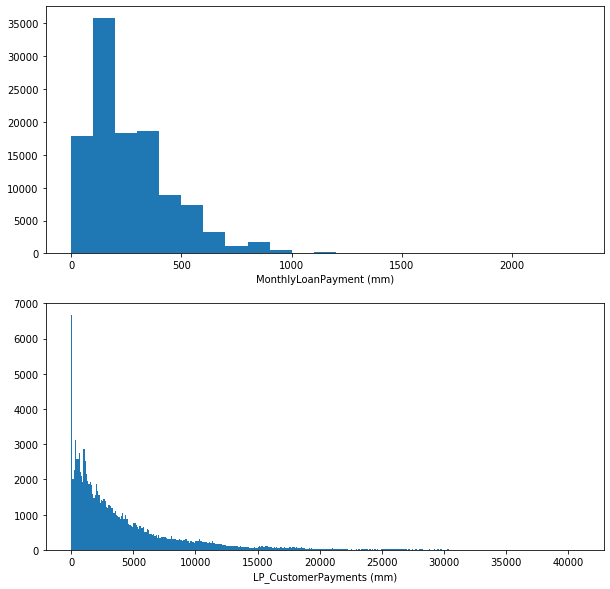

In [181]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])

variables = ['MonthlyLoanPayment', 'LP_CustomerPayments']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loans[var]), max(loans[var])+100, 100)
    ax[i].hist(data = loans, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

Lets look at some loans that have less than 200 payments especially 0.

In [182]:
temp_low_payments = loans[(loans['MonthlyLoanPayment'] <= 100) & (loans['LP_CustomerPayments'] <= 100)]
temp_low_payments.shape[0]

817

In [183]:
temp_low_payments.LoanStatus.unique()

['Defaulted', 'Current', 'Cancelled', 'Chargedoff', 'Completed', 'Past Due (91-120 days)', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (31-60 days)']
Categories (9, object): ['Completed' < 'Current' < 'Past Due (1-15 days)' < 'Defaulted' ... 'Cancelled' < 'Past Due (31-60 days)' < 'Past Due (91-120 days)' < 'FinalPaymentInProgress']

In [184]:
temp_low_payments[~temp_low_payments['LoanStatus'].isin(['Current', 'Completed', 'FinalPaymentInProgress'])].shape[0]

369

369 loans out 817 have statuses that are not Current or completed. This would indicate that monthly payments may be related to loans completing.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The varriable Term is mostly 10-20, 30-40 and 50-60 with most loans terms falling in the range 30-40.

BorrowerAPR is mostly unimodal and peaks between 0.1 to 0.2 approximately. So does BorrowerRate.

CreditScoreRangeLower and CreditScoreRangeUpper are unimodal as well. They between 600-800 mostly. We did notice that the many loans with lower credit score failed to complete. They Defaulted or chargedoff.

'MonthlyLoanPayment', 'LP_CustomerPayments' are right scewed and lost of the loans have 0 and less payments. Almost half of these are Defaulted, Cancelled, Past Due status.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [185]:
loans.IncomeRange.unique()

['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+', '$75,000-99,999', '$1-24,999', 'Not employed', '$0']
Categories (8, object): ['$25,000-49,999' < '$50,000-74,999' < 'Not displayed' < '$100,000+' < '$75,000-99,999' < '$1-24,999' < 'Not employed' < '$0']

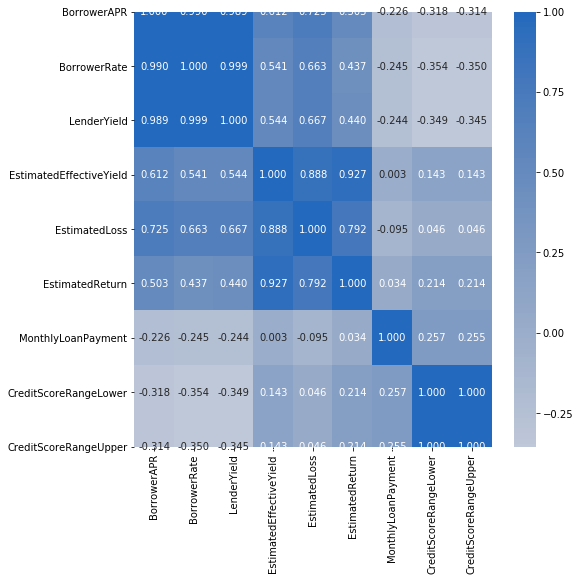

In [186]:
plt.figure(figsize = [8, 8])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = -1)
plt.show()

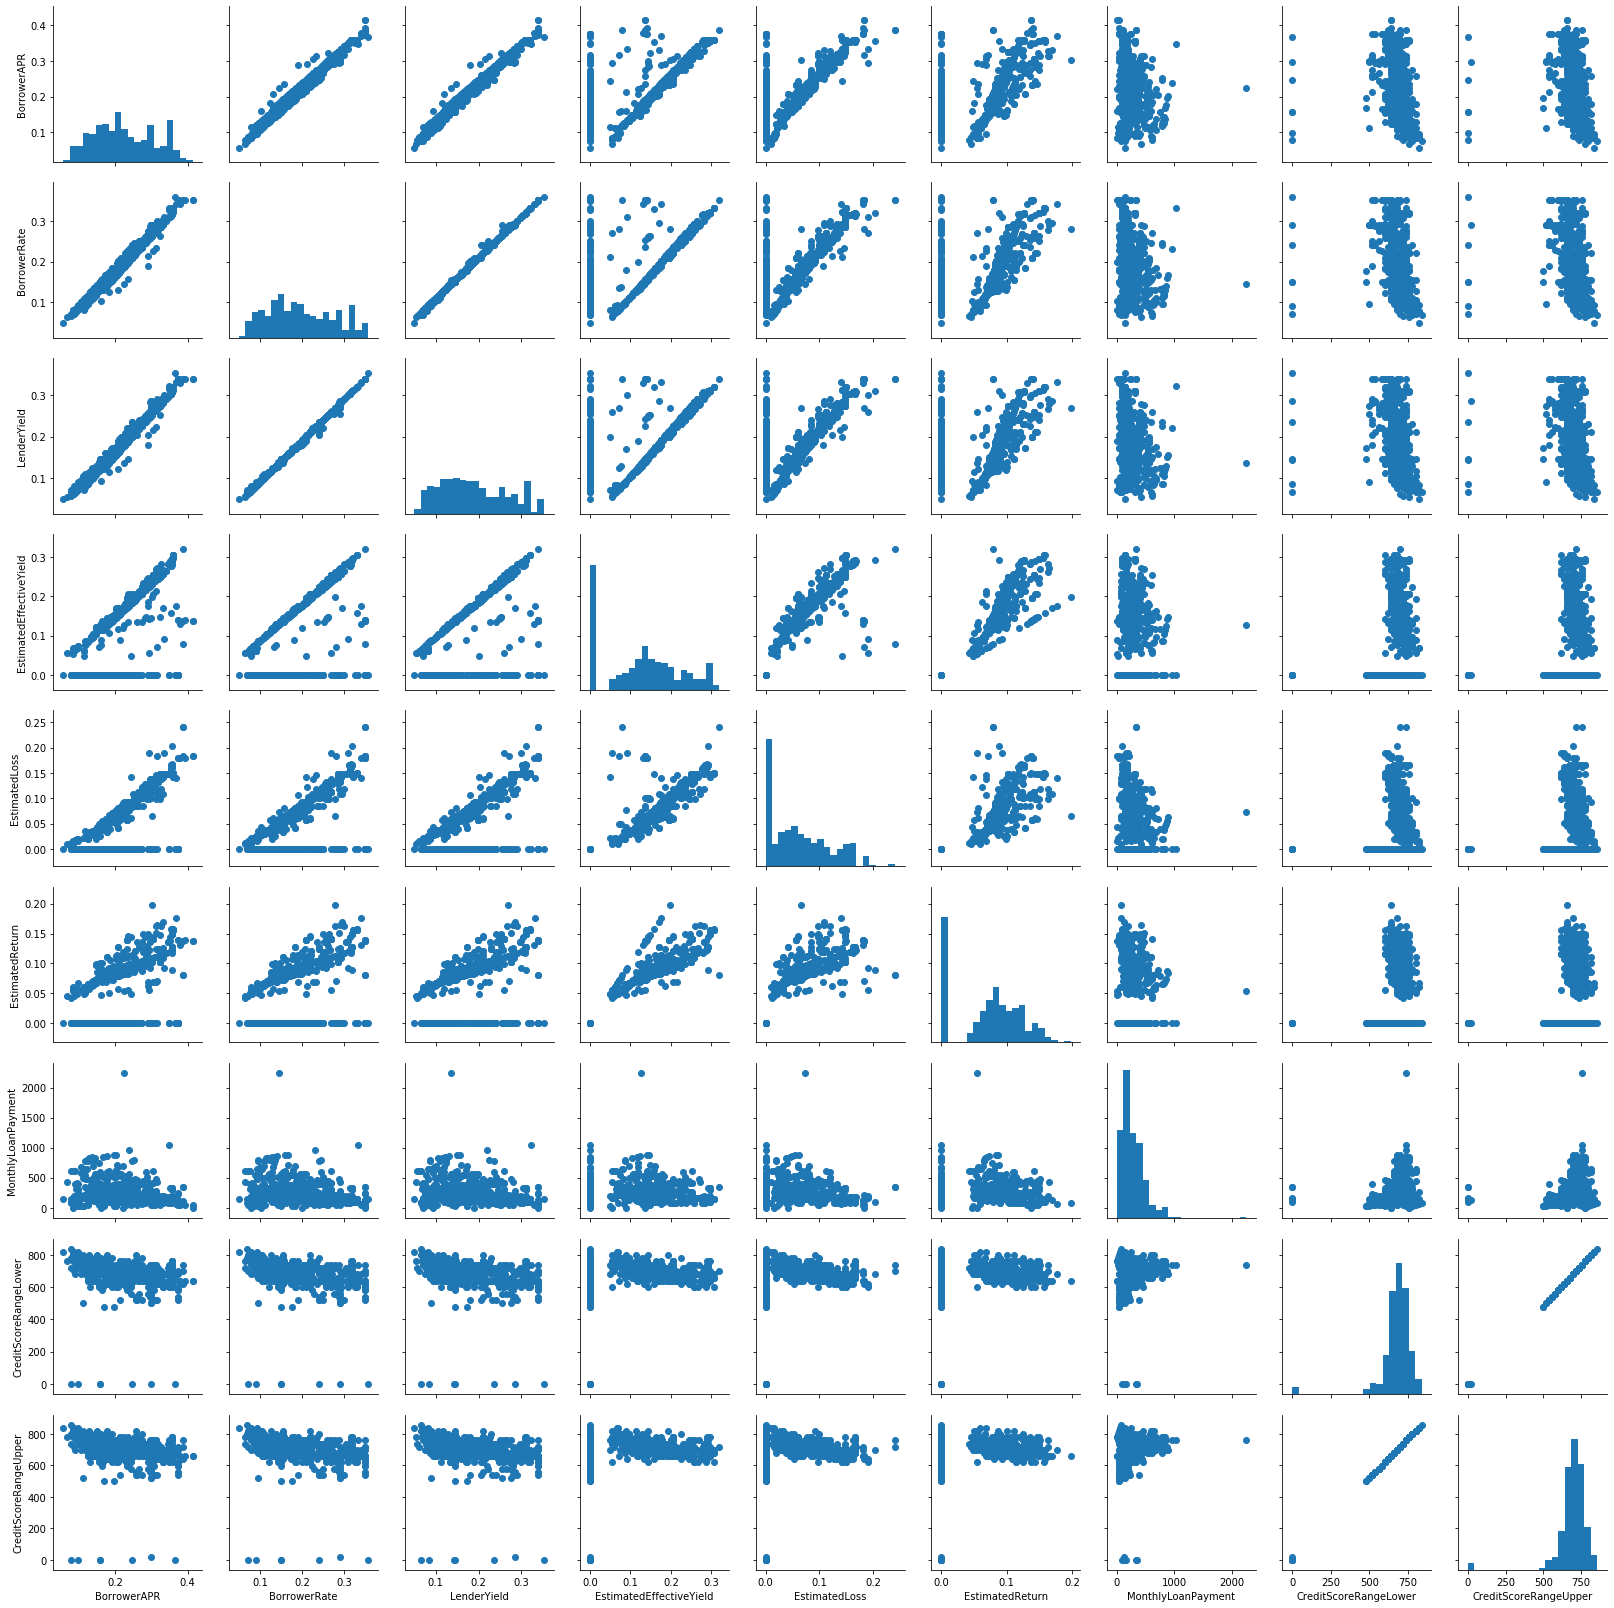

In [187]:
samples = np.random.choice(loans.shape[0], 500, replace = False)
loans_samp = loans.loc[samples,:]

[loans[col].fillna(0, inplace=True) for col in numeric_vars]

g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

There are some interesting relattionships in the above plot. Lets note them one by one:

LenderYield and EstimatedEffectiveYield increase as interest rate and APR increase.
EstimatedLoss and Estimated return increase as rate and APR increase with a few outliers.
InterestRate and APR are lower in higher credit score range.
Esitimated Loss is more in less monthly payments range and so is Estimated Return.

Surprisingly, loss and return have same group of parameters that control them. They increase with rate and less monthly payments. They also decrease when the rate decreases and monthly payment increases.

Let us move on to some other visualizations and find anything more interesting.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


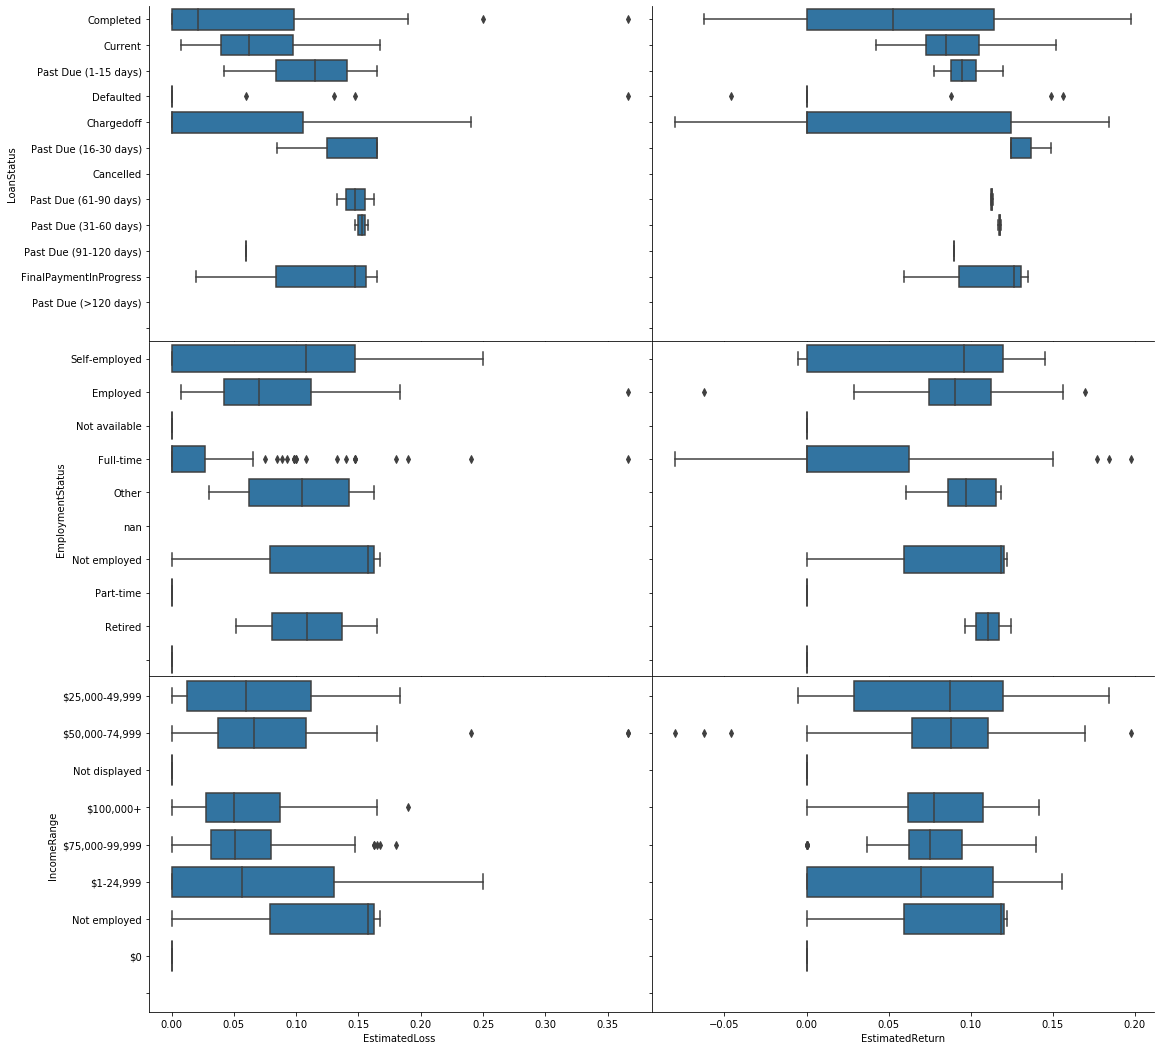

In [188]:
# plot matrix of numeric features against categorical features.

categoric_vars_forpairgrid = ['LoanStatus', 'EmploymentStatus', 'IncomeRange']

loans_samp = loans.sample(500, random_state=42)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

g = sb.PairGrid(data = loans_samp, x_vars = ['EstimatedLoss', 'EstimatedReturn'], y_vars = categoric_vars_forpairgrid,
                size = 100, aspect = 1.5)
g.map(boxgrid)
g.fig.set_size_inches(14, 14);
plt.show();

The completed loans have EstimatedLoss between 0.05 to 0.10 and EstimatedReturn between 0.075 and 0.33. The defaulted loans have higher range of EstimatedLoss and EsitimatedReturn. Self Employed loans have higher range of EstimatedLoss and EstimatedReturn. The income range realy does not impact higher EstimatedLoss or EstimatedReturn. The more or less fall in the same range.

No handles with labels found to put in legend.


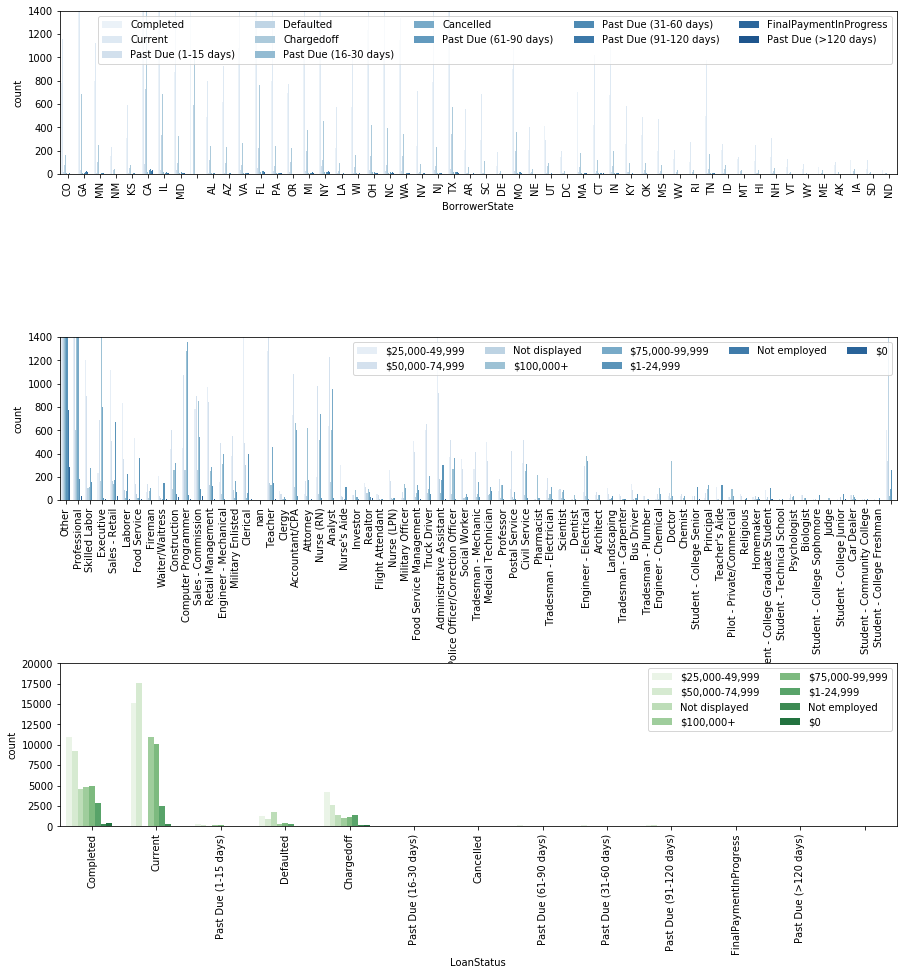

In [146]:
plt.figure(figsize = [15, 15])
plt.subplots_adjust(hspace=1)
fig.legend(loc="upper right")

# subplot 1: BorrowerState vs LoanStatus
ax = plt.subplot(3, 1, 1)
ax.set_ylim(0,1400)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
sb.countplot(data = loans, x = 'BorrowerState', hue = 'LoanStatus', palette = 'Blues')
ax.legend(loc = 1, ncol = 5)

# subplot 2: Occupation vs. IncomeRange
ax = plt.subplot(3, 1, 2)
ax.set_ylim(0,1400)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
sb.countplot(data = loans, x = 'Occupation', hue = 'IncomeRange', palette = 'Blues')
ax.legend(loc = 1, ncol = 5) # re-arrange legend to reduce overlapping

# subplot 3: LoanStatus vs. IncomeRange, use different color palette
ax = plt.subplot(3, 1, 3)
ax.set_ylim(0,20000)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
sb.countplot(data = loans, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

No handles with labels found to put in legend.


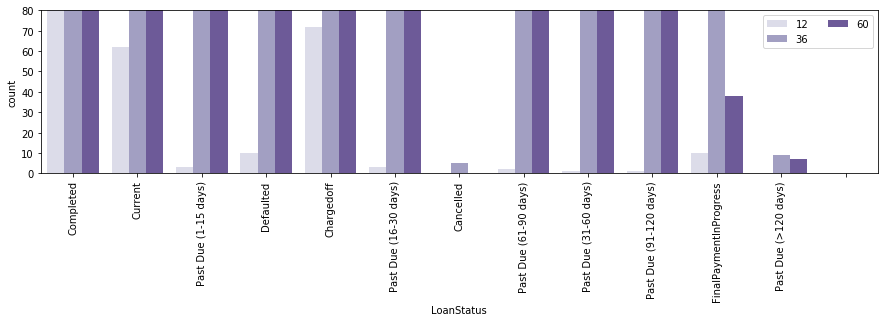

In [151]:
plt.figure(figsize = [15, 15])
plt.subplots_adjust(hspace=1)
fig.legend(loc="upper right")

# subplot 3: LoanStatus vs. IncomeRange, use different color palette
ax = plt.subplot(3, 1, 3)
ax.set_ylim(0,max(loans['Term'])+20)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
sb.countplot(data = loans, x = 'LoanStatus', hue = 'Term', palette = 'Purples')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

There are some Defaulted loans concentrated around 4 states. GA, CA, FL and NY.
Most of the loans are processed for Professional customers than other occupations.
We can notice some $0 income range loans in Chargedoff, Current and Completed.

In [150]:
highpendingstates = loans[loans['BorrowerState'].isin(['GA', 'CA', 'FL', 'NY'])]
highpendingstates.LoanStatus.value_counts()

Current                   16855
Completed                 10738
Chargedoff                 3482
Defaulted                  1418
Past Due (1-15 days)        245
Past Due (91-120 days)      101
Past Due (31-60 days)       100
Past Due (61-90 days)        87
FinalPaymentInProgress       80
Past Due (16-30 days)        64
Past Due (>120 days)          3
Cancelled                     1
                              0
Name: LoanStatus, dtype: int64

There are 10482 loans that are PastDue or defaulted in these 4 states alone.

In [139]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [140]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
numeric_vars = ['BorrowerAPR','BorrowerRate','LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'MonthlyLoanPayment', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']
#categoric_vars = ['BorrowerState', 'LoanStatus', 'Occupation', 'EmploymentStatus', 'IncomeRange']
categoric_vars = ['BorrowerState', 'LoanStatus']

loans['log_apr'] = loans['BorrowerAPR'].apply(log_trans)
loans['cr_apr'] = loans['BorrowerAPR'].apply(cuberoot_trans)

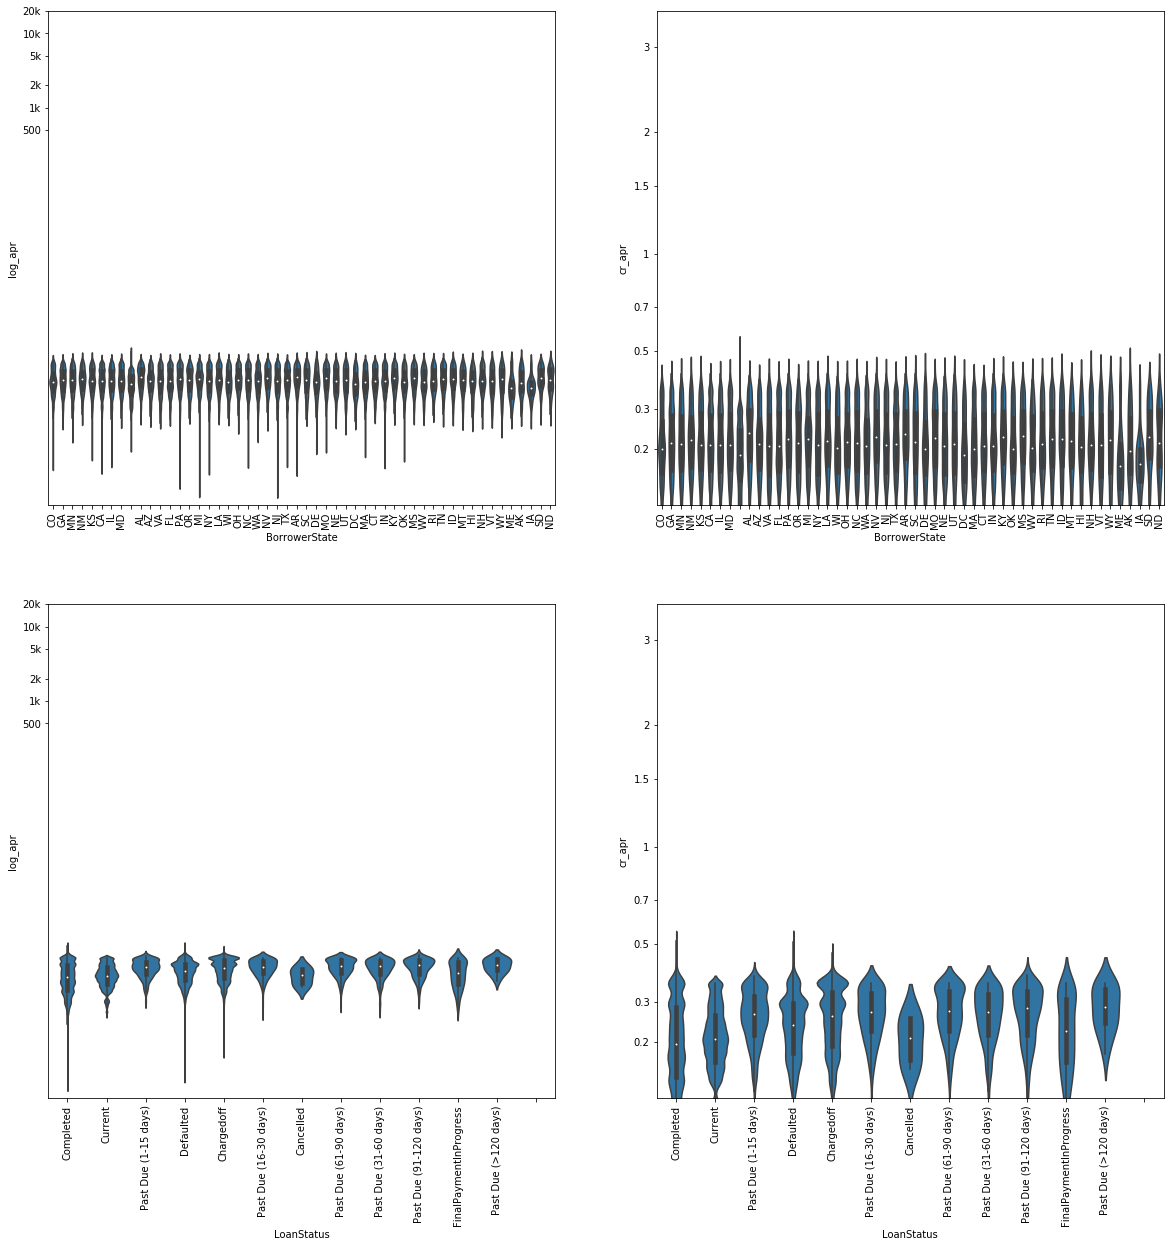

In [141]:
fig, ax = plt.subplots(ncols = 2, nrows = len(categoric_vars) , figsize = [20,20])
ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]

plotdata = loans[['cr_apr', 'log_apr', 'BorrowerState', 'LoanStatus']][loans['log_apr'] != float("-inf")]

default_color = sb.color_palette()[0]

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = plotdata, x = var, y = 'log_apr', ax = ax[i,0],
               color = default_color)
    for tick in ax[i,0].get_xticklabels():
        tick.set_rotation(90)
    ax[i,0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[i,0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
    sb.violinplot(data = plotdata, x = var, y = 'cr_apr', ax = ax[i,1],
               color = default_color)
    
    for tick in ax[i,1].get_xticklabels():
        tick.set_rotation(90)
    ax[i,1].set_yticks(cuberoot_trans(np.array(ticks)))
    ax[i,1].set_yticklabels(ticks)
    ax[i,1].set_ylim(cuberoot_trans(np.array([0.1, 3.5])))

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

BorrowerAPR does surpisingly have a relationship with LoanStatus. It also shows a very expected relationship with IncomeRange and EmploymentStatus. BorrowerAPR is highest in cases of more pending LoanStatus cases. Note that it is also higher in the case of the Not Employed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Some expected relationships were found in the  above plot. APR related to IncomeRange and Employment Status. More interestingly, the relationship between LoanStatus and APR is worth noticing. Pending cases are more in high APR areas. This may be one of the areas to look into to close or take any action on the pending cases.


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the categorical measures play into the relationship between pending or incomplete loans and InterestRate/APR and Credit Score.

In [20]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(3.5)+.05, .05)
    bins_y = np.arange(2.4, 4.3+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks(cuberoot_trans(np.array(ticks)), ticks)
    plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),
               [500, '1k', '2k', '5k', '10k', '20k'])

In [32]:
ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]
loans['cr_apr'] = loans['BorrowerAPR'].apply(cuberoot_trans)

samples = np.random.choice(loans.shape[0], 1000, replace = False)
loans_samp = loans.loc[samples,:]

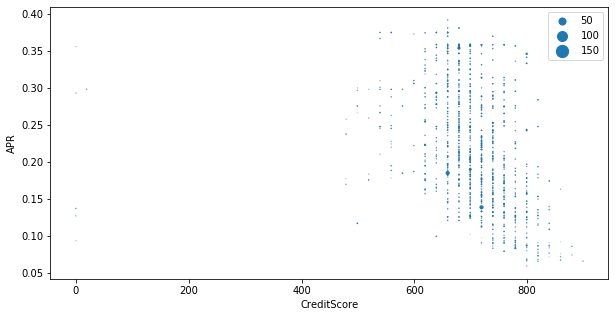

In [44]:
# create faceted heat maps on levels of the cut variable

plt.figure(figsize = [10,5])
plt.scatter(data = loans_samp, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', s = 'DebtToIncomeRatio')

# dummy series for adding legend
sizes = [50, 100, 150]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.xlabel('CreditScore')
plt.ylabel('APR')
plt.legend(legend_obj, sizes)

plt.show()

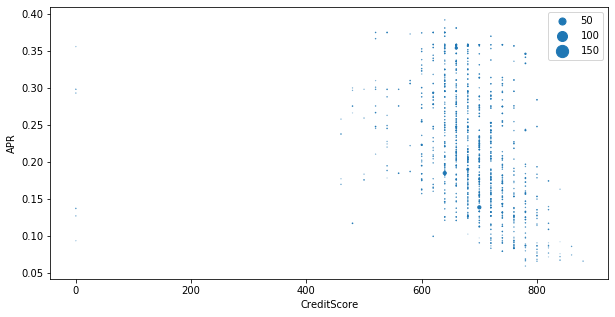

In [45]:
plt.figure(figsize = [10,5])
plt.scatter(data = loans_samp, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', s = 'DebtToIncomeRatio')

# dummy series for adding legend
sizes = [50, 100, 150]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.xlabel('CreditScore')
plt.ylabel('APR')
plt.legend(legend_obj, sizes)

plt.show()

With exception of a few outliers, interest rate is evenly distributed across the 600-800 credit score. With DebtToIncomeRatio highly concentrated between 600-700.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

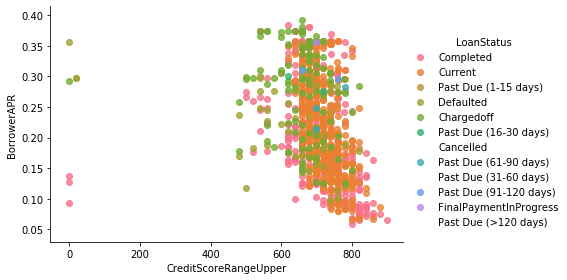

In [52]:
plt.figure(figsize = [10,5])
g = sb.FacetGrid(data = loans_samp, hue='LoanStatus', size=4, aspect=1.5)
g = g.map(sb.regplot, 'CreditScoreRangeUpper', 'BorrowerAPR', x_jitter=0.4, fit_reg=False)
g.add_legend()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

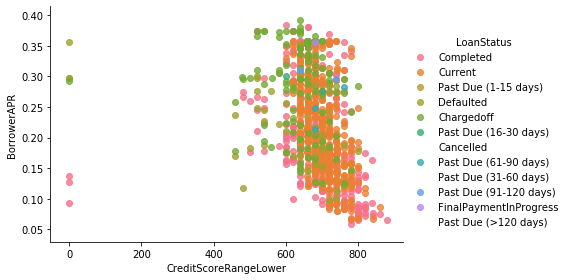

In [53]:
plt.figure(figsize = [10,5])
g = sb.FacetGrid(data = loans_samp, hue='LoanStatus', size=4, aspect=1.5)
g = g.map(sb.regplot, 'CreditScoreRangeLower', 'BorrowerAPR', x_jitter=0.4, fit_reg=False)
g.add_legend()

Noticeably, there is more concentration of 'ChargedOff' in the higher interest area than the lower ones. This might an useful view to handle high interest loans in a slightly different way to avoid them being ChargedOff.

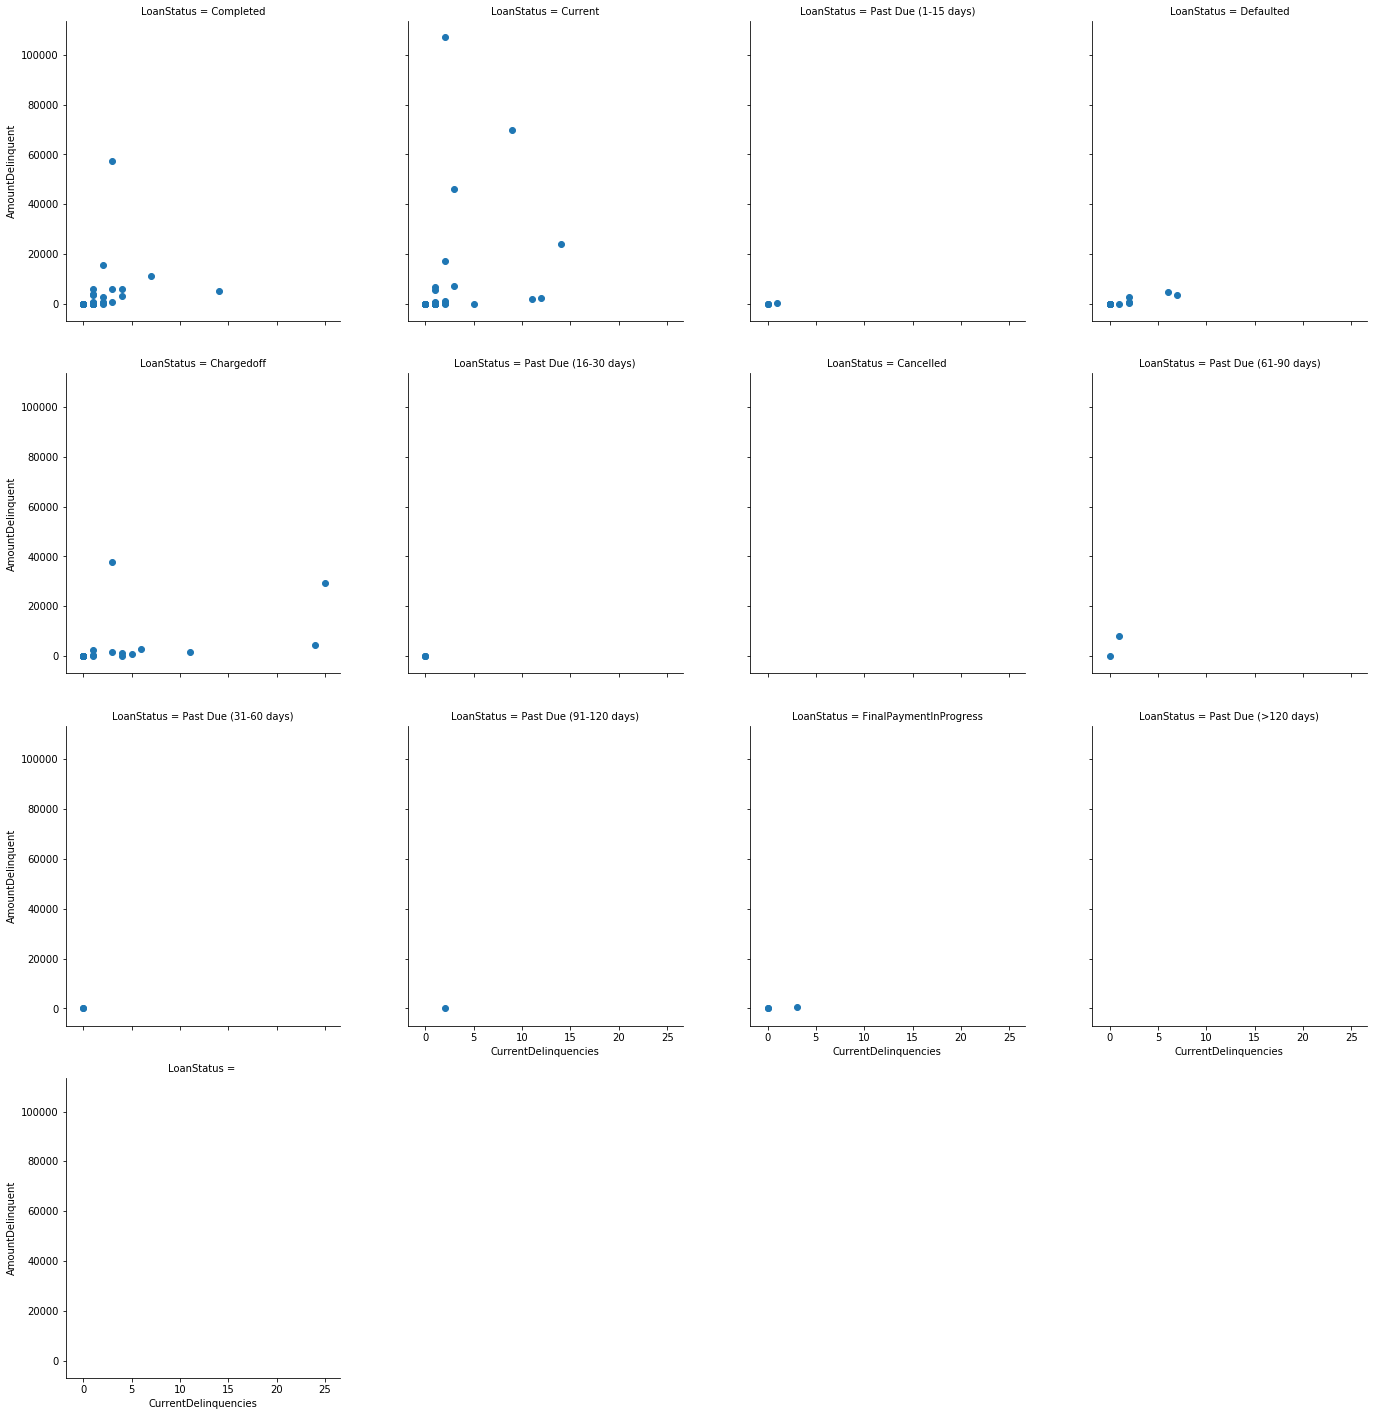

In [203]:
g = sb.FacetGrid(data = loans_samp, col='LoanStatus', margin_titles=True, col_wrap=4, height=4, aspect=0.7)
g = g.map(plt.scatter, 'CurrentDelinquencies', 'AmountDelinquent')
g.fig.set_figwidth(20)
g.fig.set_figheight(20)
g.add_legend()

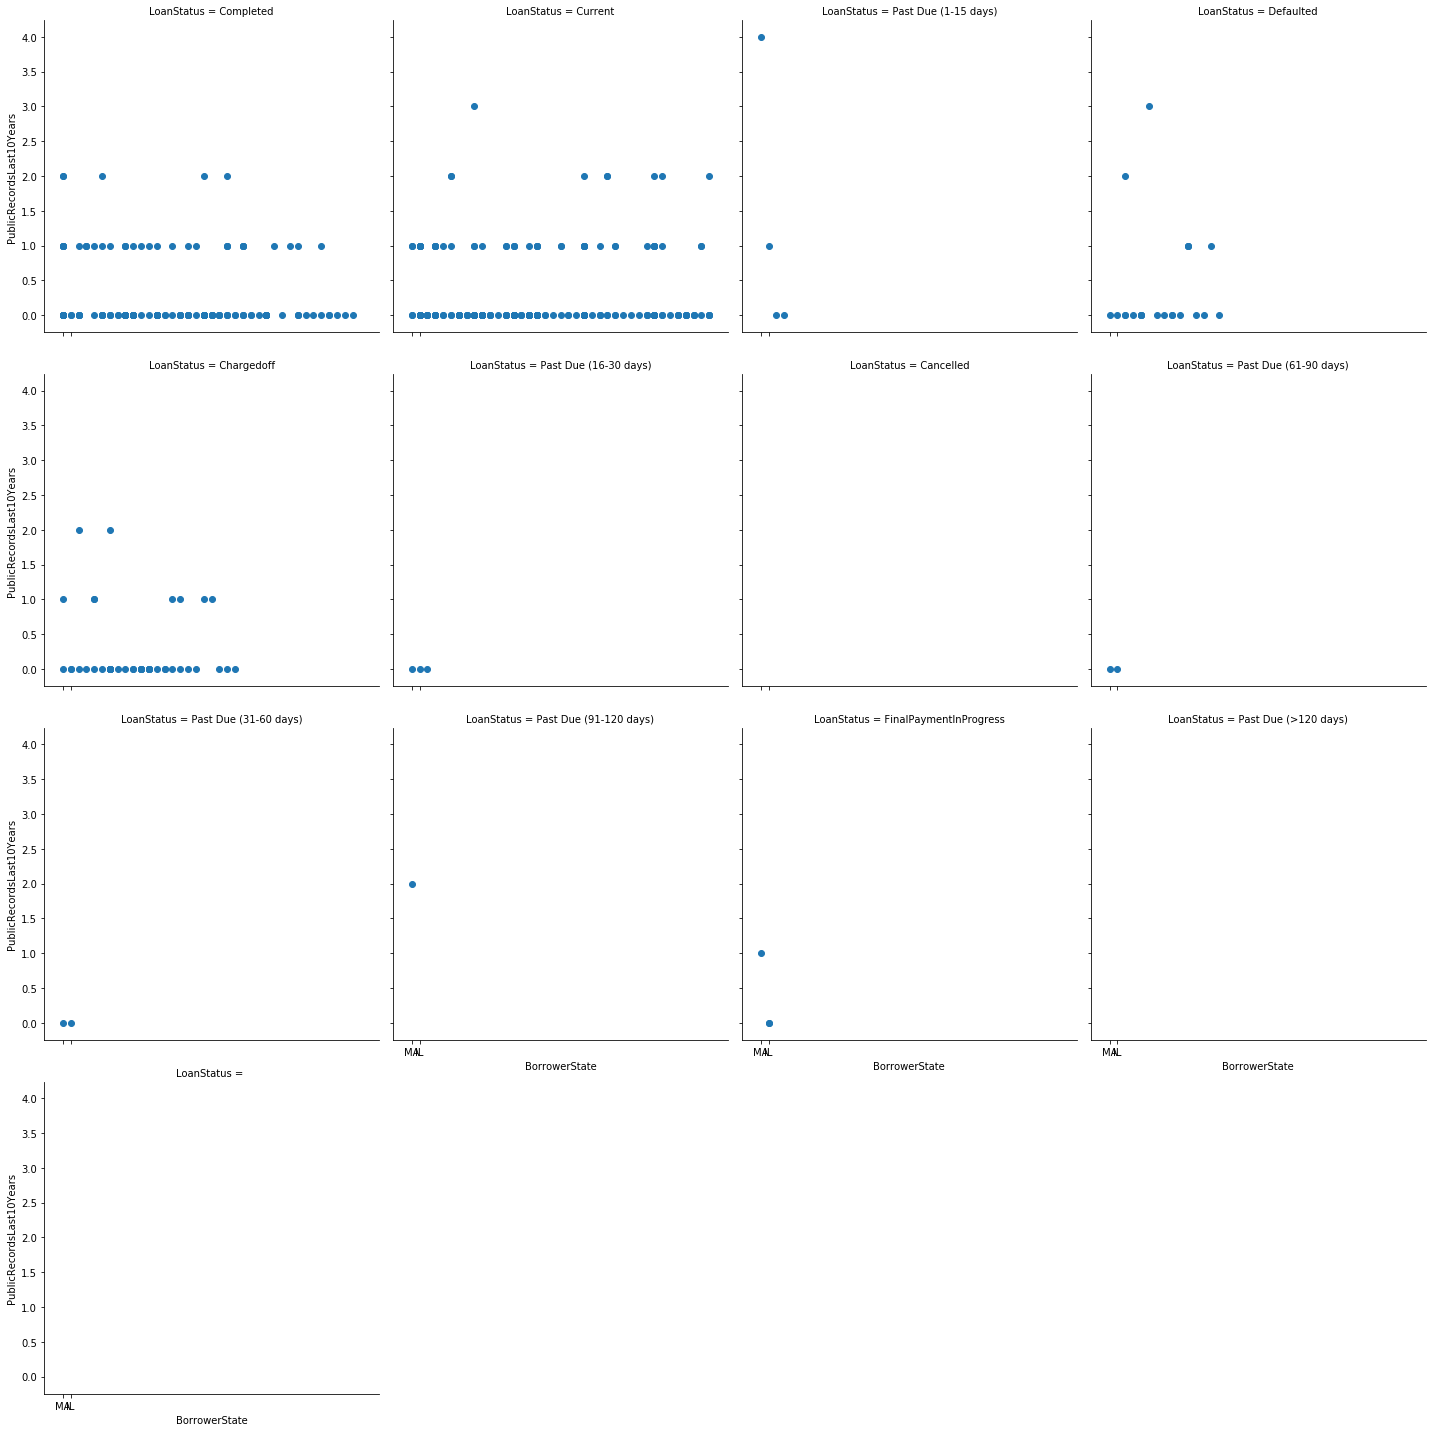

In [204]:
g = sb.FacetGrid(data = loans_samp, col = 'LoanStatus', margin_titles=True, col_wrap=4, height=4, aspect=0.7)
g.fig.set_figwidth(20)
g.fig.set_figheight(20)
g.map(plt.scatter, 'BorrowerState', 'PublicRecordsLast10Years')

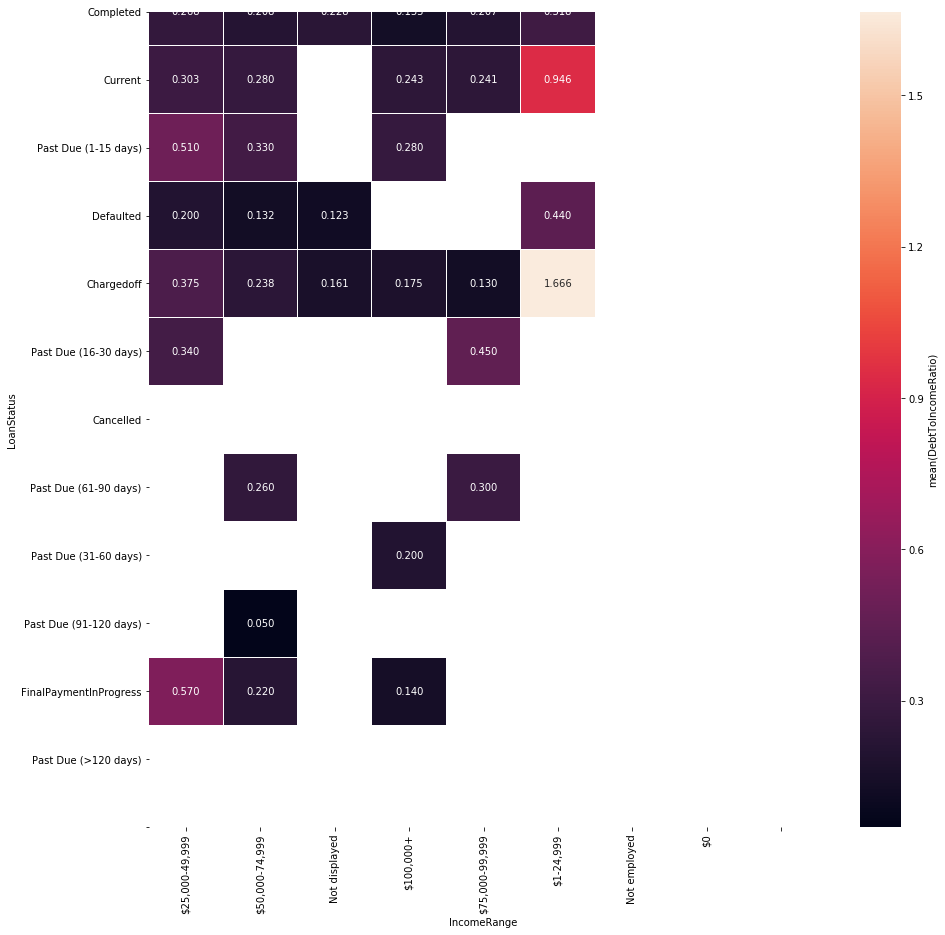

In [211]:
plt.figure(figsize=(15,15))
plt.tight_layout()

cat_means = loans_samp.groupby(['IncomeRange', 'LoanStatus']).mean()['DebtToIncomeRatio']
cat_means = cat_means.reset_index(name = 'DebtToIncomeRatio_avg')
cat_means = cat_means.pivot(index = 'LoanStatus', columns = 'IncomeRange',
                            values = 'DebtToIncomeRatio_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(DebtToIncomeRatio)'}, linewidths=0.1)

The DebtToIncomeRatio is lower in the Defaulted and ChargedOff group. Also, similar observation even in many of the pending groups.

[Text(0, 0, 'Completed'),
 Text(0, 0, 'Current'),
 Text(0, 0, 'Past Due (1-15 days)'),
 Text(0, 0, 'Defaulted'),
 Text(0, 0, 'Chargedoff'),
 Text(0, 0, 'Past Due (16-30 days)'),
 Text(0, 0, 'Cancelled'),
 Text(0, 0, 'Past Due (61-90 days)'),
 Text(0, 0, 'Past Due (31-60 days)'),
 Text(0, 0, 'Past Due (91-120 days)'),
 Text(0, 0, 'FinalPaymentInProgress'),
 Text(0, 0, 'Past Due (>120 days)')]

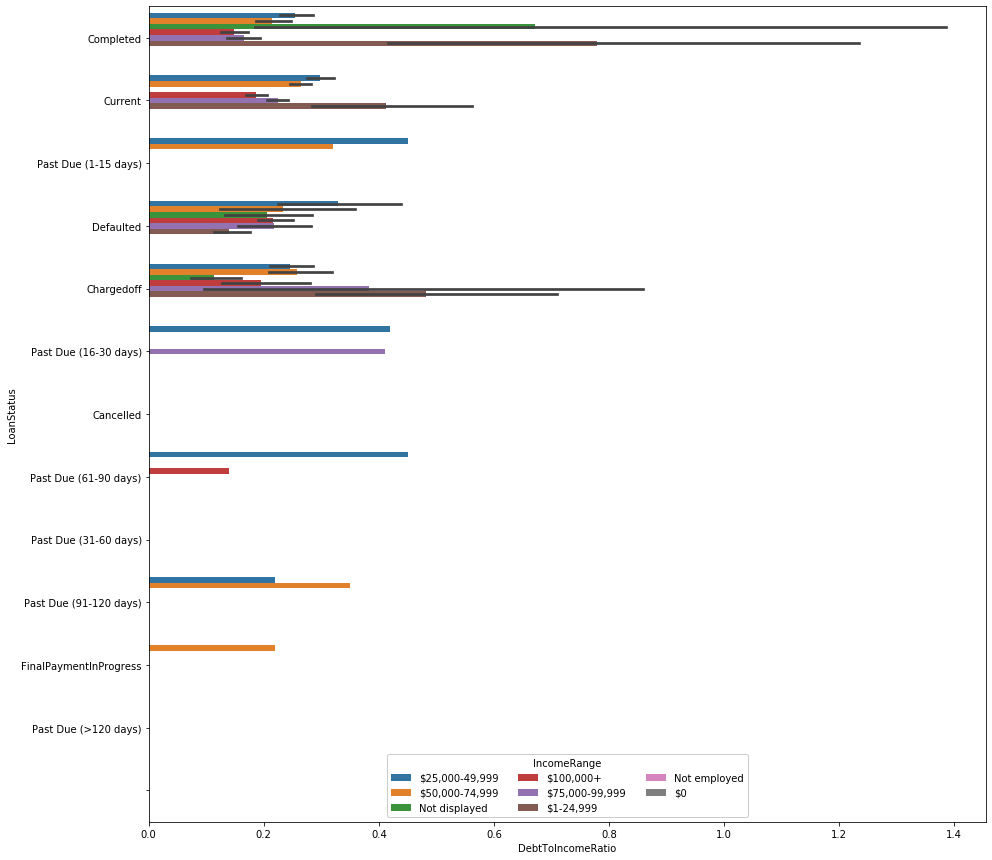

In [110]:
plt.figure(figsize=(15,15))
ax = sb.barplot(data = loans_samp, x = 'DebtToIncomeRatio', y = 'LoanStatus', hue = 'IncomeRange')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'IncomeRange')
ax.set_yticklabels(labels=loans.LoanStatus.unique().to_list(), rotation=0)

Many of the Past Due loans are in 25k-49k income range. The second biggest group that is pending is 50k-74k income range. There are also 100k income range group dominant in Past Due 61-90 days.

In [123]:
plotdata = loans[loans['EstimatedReturn'] != 0]
plotdata.shape[0]

84852

[Text(0, 0, 'Completed'),
 Text(0, 0, 'Current'),
 Text(0, 0, 'Past Due (1-15 days)'),
 Text(0, 0, 'Defaulted'),
 Text(0, 0, 'Chargedoff'),
 Text(0, 0, 'Past Due (16-30 days)'),
 Text(0, 0, 'Cancelled'),
 Text(0, 0, 'Past Due (61-90 days)'),
 Text(0, 0, 'Past Due (31-60 days)'),
 Text(0, 0, 'Past Due (91-120 days)'),
 Text(0, 0, 'FinalPaymentInProgress'),
 Text(0, 0, 'Past Due (>120 days)')]

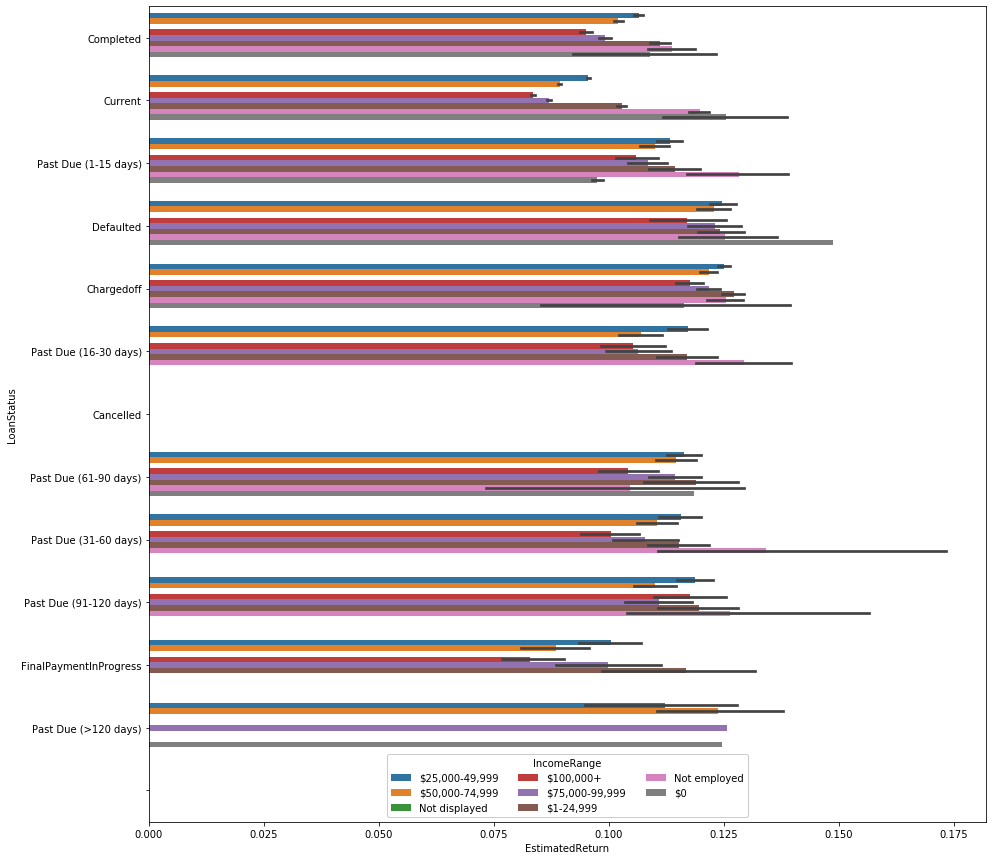

In [124]:
plt.figure(figsize=(15,15))
ax = sb.barplot(data = plotdata, x = 'EstimatedReturn', y = 'LoanStatus', hue = 'IncomeRange')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'IncomeRange')
ax.set_yticklabels(labels=loans.LoanStatus.unique().to_list(), rotation=0)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of LoanStatus with other parameter. Some interesting findings in this data are below:
1. Many of the defaulted and pending loans are in two income ranges 25k-49k, 50k-74k
2. A good 492 out 662 loans are Defaulted or Chargedoff in the low credit scores dataset. That does indicate that LoanStatus is dependent on the credit scores of the customers that requeste the loan.
3. There are 10482 loans that are PastDue or defaulted in these 4 states alone.
4. There are some other findings like surpisingly many past due loans have less Monthly payments and also have higher interest.

### Were there any interesting or surprising interactions between features?

It is interesting there are multiple parameters that influence the loans that have not been completed. We have explored them at each step using a variety of plots that will give different views of the data. It includes exploring variables individually, pairs and mutliple of them. IncomeRange, CreditScores, Location, Monthly Payments and higher interest rates. We will be focusing on these parameters for some actionable insights.